In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from config import api_key
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
import datetime
%matplotlib inline

In [7]:
#Better Way to Get S&P 500 Data:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

start_sp = datetime.datetime(1989, 1, 1)
end_sp = datetime.datetime(2019, 3, 31)

end_of_last_year = datetime.datetime(2017, 12, 29)

yf.pdr_override()
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_sp,
                             end_sp)
    
sp500.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000
1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000
1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000
1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000
1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000


In [4]:
sp_daily = sp500

In [5]:
#spx = spx.reset_index().set_index('Date', drop=False)
sp_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 1989-01-03 to 2019-03-29
Data columns (total 6 columns):
Open         7620 non-null float64
High         7620 non-null float64
Low          7620 non-null float64
Close        7620 non-null float64
Adj Close    7620 non-null float64
Volume       7620 non-null int64
dtypes: float64(5), int64(1)
memory usage: 416.7 KB


In [10]:
sp_daily['gain_loss'] = (sp_daily['Close'] - sp_daily['Close'].shift(1)) / sp_daily['Close'].shift(1)
sp_daily.head()

,Open,High,Low,Close,Adj Close,Volume,gain_loss
Date,,,,,,,
1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000,NaN
1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000,0.014965
1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000,0.002076
1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000,0.002357
1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000,0.001104


In [19]:
#Create Volume Weighted Moving Average Column with a Rolling Period of 20 Days
rp = 20

sp_daily['vwma'] = (sp_daily['Close'] * sp_daily['Volume']).rolling(rp).sum() / sp_daily['Volume'].rolling(rp).sum()

In [20]:
start_date = '2004-01-01'
end_date = '2018-12-31'

sp0418 = sp_daily['2004':'2018']

In [21]:
sp_daily.head()
sp_daily.tail()
sp_daily.info()

,Open,High,Low,Close,Adj Close,Volume,vwma
Date,,,,,,,
1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000,NaN
1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000,NaN
1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000,NaN
1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000,NaN
1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000,NaN


,Open,High,Low,Close,Adj Close,Volume,vwma
Date,,,,,,,
2019-03-25,2796.01,2809.79,2785.02,2798.36,2798.36,3376580000,2799.470000
2019-03-26,2812.66,2829.87,2803.99,2818.46,2818.46,3266050000,2800.546354
2019-03-27,2819.72,2825.56,2787.72,2805.37,2805.37,3372930000,2801.164449
2019-03-28,2809.40,2819.71,2798.77,2815.44,2815.44,3158170000,2802.746174
2019-03-29,2828.27,2836.03,2819.23,2834.40,2834.40,3740700000,2804.282655


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 1989-01-03 to 2019-03-29
Data columns (total 7 columns):
Open         7620 non-null float64
High         7620 non-null float64
Low          7620 non-null float64
Close        7620 non-null float64
Adj Close    7620 non-null float64
Volume       7620 non-null int64
vwma         7601 non-null float64
dtypes: float64(6), int64(1)
memory usage: 796.2 KB


In [22]:
#Collapse 2004 - 2018 DataFrame on Month
sp_monthly = sp_daily.resample('M').agg({'Close': 'last', 'Volume': 'sum', 'vwma': 'last'})
sp_monthly.head()

,Close,Volume
Date,,
1989-01-31,297.47,3532220000
1989-02-28,288.86,3216280000
1989-03-31,294.87,3504530000
1989-04-30,309.64,3237250000
1989-05-31,320.52,3747320000


In [30]:
#Exploring Moving Averages - 20 Day Moving Average of Daily S&P Closing Price
rm = 20

def find_MA_mean(df_close, rm):
    
    return df_close.rolling(rm).mean()

def find_MA_std(df_close, rm):
    
    return df_close.rolling(rm).std()

sp20day_mean = find_MA_mean(sp_daily['Close'], rm)
sp20month_mean = find_MA_mean(sp_monthly['Close'], rm)
sp20day_std = find_MA_std(sp_daily['Close'], rm)
sp20month_std = find_MA_std(sp_monthly['Close'], rm)

In [31]:
#Exploring Moving Addresses - 100 Day Moving Average of Daily S&P Closing Price
rm = 100

def find_MA_mean(df_close, rm):
    
    return df_close.rolling(rm).mean()

def find_MA_std(df_close, rm):
    
    return df_close.rolling(rm).std()

sp100day_mean = find_MA_mean(sp_daily['Close'], rm)
sp100month_mean = find_MA_mean(sp_monthly['Close'], rm)
sp100day_std = find_MA_std(sp_daily['Close'], rm)
sp100month_std = find_MA_mean(sp_monthly['Close'], rm)

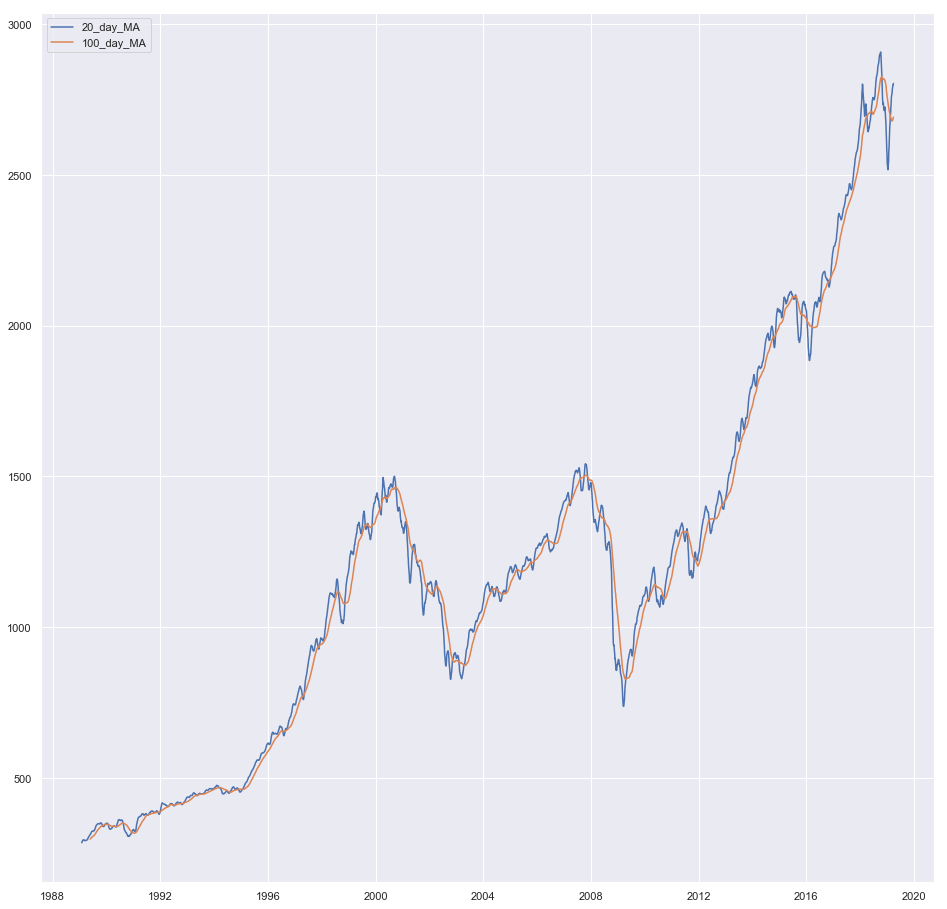

In [29]:
sns.set()

plt.figure(figsize=(16,16))

plt.plot(sp20day_mean)
plt.plot(sp100day_mean)
#plt.plot(sp_daily['Close'])

plt.legend(['20_day_MA', '100_day_MA', 'closing'], loc='upper left')


plt.show();

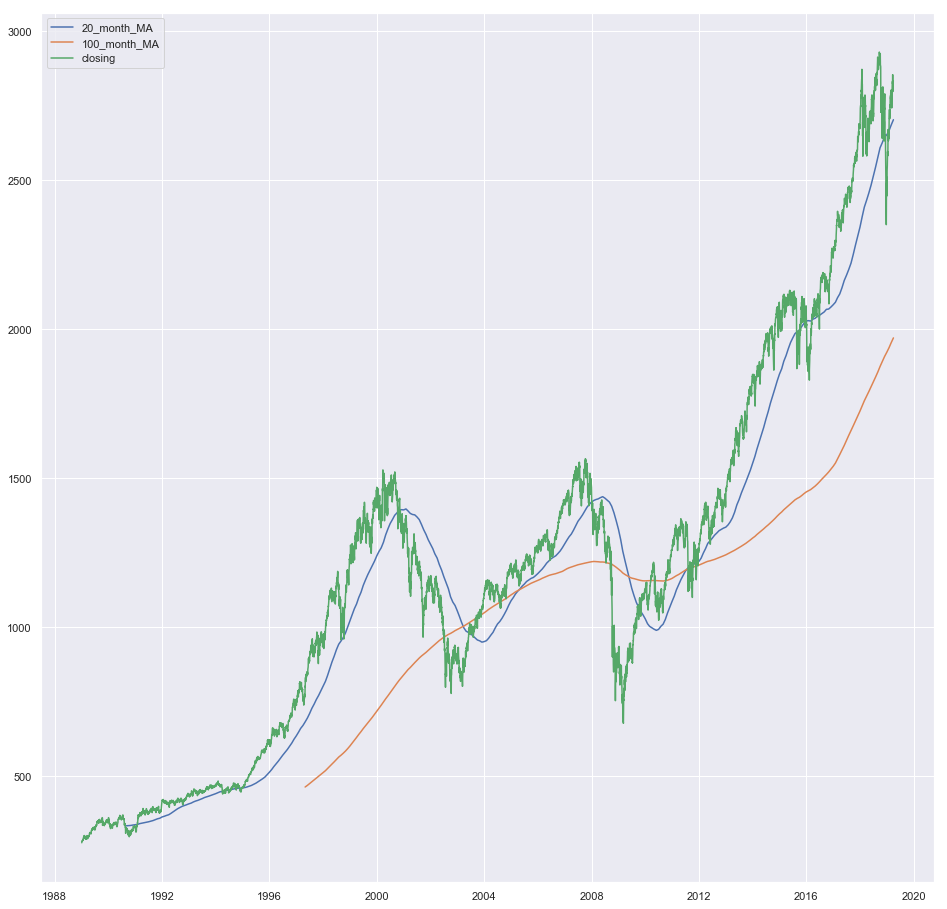

In [33]:
sns.set()

plt.figure(figsize=(16,16))

plt.plot(sp20month_mean)
plt.plot(sp100month_mean)
plt.plot(sp_daily['Close'])

plt.legend(['20_month_MA', '100_month_MA', 'closing'], loc='upper left')


plt.show();